In [2]:
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline

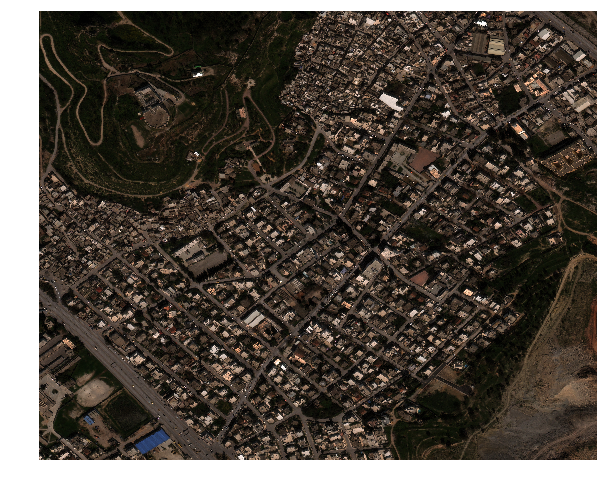

In [3]:
#Load an image
chip_name = '53.tif'
chip_path = '../xview_data_small/train_images/{}'.format(chip_name)
arr = wv.get_image(chip_path)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(arr)

In [4]:
#Loading our labels
coords, chips, classes = wv.get_labels('../xview_data_small/xView_train.geojson')
print(len(coords))
print(len(classes))

#We only want to coordinates and classes that are within our chip
coords = coords[chips==chip_name]
classes = classes[chips==chip_name].astype(np.int64)

print(len(coords))
print(len(classes))

print(coords)
print(classes)

100%|██████████| 601937/601937 [00:02<00:00, 203172.54it/s]


601937
601937
1640
1640
[[2312.   99. 2362.  147.]
 [2865.  511. 2970.  585.]
 [2860.  427. 2924.  497.]
 ...
 [ 850. 2299.  910. 2345.]
 [ 708. 2629.  735. 2657.]
 [ 796. 2652.  829. 2671.]]
[73 73 73 ... 73 62 63]


In [5]:
unique_classes = set(classes)
print(unique_classes)

{73, 18, 19, 21, 86, 23, 24, 62, 63}


In [6]:
#Load the class number -> class string label map
labels = {}
with open('xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels[int(row[0].split(":")[0])] = row[0].split(":")[1]

In [7]:
#We can find which classes are present in this image
print([labels[i] for i in np.unique(classes)])

['Small Car', 'Bus', 'Utility Truck', 'Truck', 'Cargo Truck', 'Scraper/Tractor', 'Front loader/Bulldozer', 'Building', 'Storage Tank']


In [8]:
#We can chip the image into 500x500 chips
c_img, c_box, c_cls = wv.chip_image(img = arr, coords= coords, classes=classes, shape=(500,500))
print("Num Chips: %d" % c_img.shape[0])

print(c_img.shape)
print(len(c_box))
print(len(c_cls))
print(c_box[11])
print(c_cls[11])

Num Chips: 30
(30, 500, 500, 3)
30
30
[[448. 490. 500. 500.]
 [ 85. 473. 129. 500.]
 [197. 293. 260. 358.]
 [ 97. 378. 251. 446.]
 [471. 199. 500. 255.]
 [494.  48. 500.  67.]
 [453.  40. 492.  69.]
 [485.  38. 499.  50.]
 [472.   0. 495.   1.]
 [459.   0. 478.  17.]
 [498.   2. 500.  17.]
 [480.  11. 500.  26.]
 [492.  23. 500.  41.]
 [478. 301. 500. 350.]
 [481. 265. 500. 301.]
 [489.   0. 500.   7.]
 [450.  17. 485.  43.]
 [249. 308. 285. 339.]
 [275. 289. 332. 328.]
 [135. 442. 181. 479.]
 [148. 473. 192. 500.]
 [176.  68. 263. 156.]]
[73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 86 86 73]


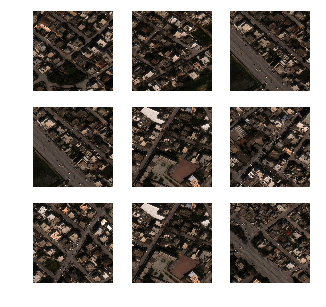

In [9]:
#We can plot some of the chips
fig,ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(5)

for k in range(9):
    plt.subplot(3,3,k+1)
    plt.axis('off')
    plt.imshow(c_img[np.random.choice(range(c_img.shape[0]))])

plt.show()

1
448.0 329.0 462.0 341.0


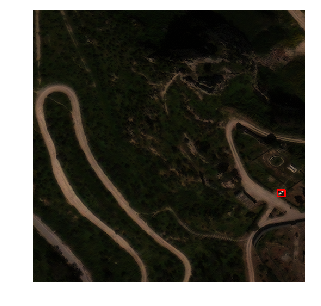

In [19]:
#We can visualize the chips with their labels
ind = np.random.choice(range(c_img.shape[0]))
ind = 0
print(len(c_cls[ind]))
xmin, ymin, xmax, ymax = c_box[ind][0]
print(xmin, ymin, xmax, ymax)
labelled = aug.draw_bboxes(c_img[ind],c_box[ind])
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(labelled)

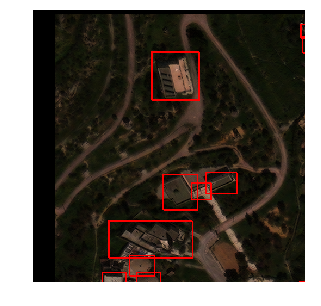

In [16]:
#We can shift the chips
i1,b1 = aug.shift_image(c_img[ind],c_box[ind])
a1 = aug.draw_bboxes(i1,b1)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(a1)

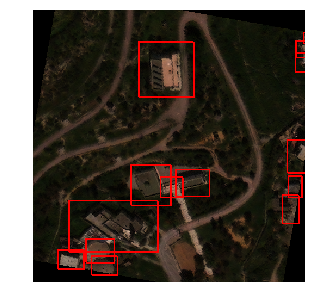

In [18]:
#We can rotate the chips
center = (int(c_img[ind].shape[0]/2),int(c_img[ind].shape[1]/2))
i2,b2 = aug.rotate_image_and_boxes(c_img[ind],10, center, c_box[ind])
a2 = aug.draw_bboxes(i2,b2)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(a2)

In [11]:
#There are other augmentations available in 'aug_util.py'
#From here, you can save out the chipped images to a TFRecord or other medium
#Use 'process_wv.py' to create a TFRecord file from xView imagery